In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyarrow

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import plot_tree

In [ ]:
# Reading the dataset
df = pd.read_parquet('final_dataset.parquet')

# Replacing NaN values with 0
df = df.fillna(0)

# 4881 rows × 9 columns

In [ ]:
df.head()

# note that cfs stands for cubic feet/person
# gwl stands for ground water level
# 4881 rows × 9 columns

,date,precip,max_temp,min_temp,gwl,daily_discharge_cfs,sm_pca,st_pca,target
0,2010-02-14,0.0,36,13,20.52,136.0,3.619512,0.190574,0
1,2010-02-15,0.0,41,7,20.51,129.0,3.470118,0.209177,0
2,2010-02-16,0.0,43,8,20.51,130.0,3.433721,0.197542,0
3,2010-02-17,0.0,51,10,20.51,132.0,3.351107,0.135033,0
4,2010-02-18,0.0,51,16,20.50,135.0,3.238121,0.107690,0


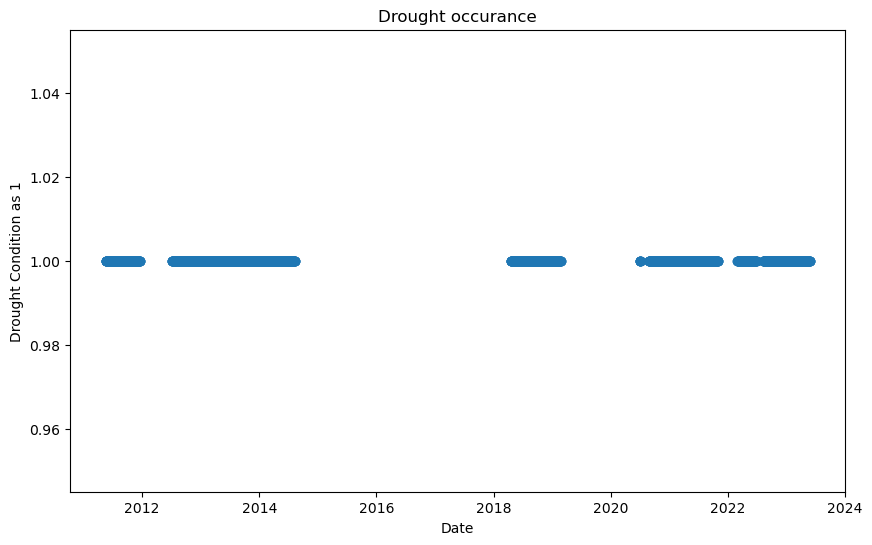

In [ ]:
# Visualizing where target variable is 1 i.e there is drought

plt.figure(figsize=(10, 6))
plt.scatter(df[df['target'] == 1]['date'], df[df['target'] == 1]['target'])
plt.title('Drought occurance')
plt.xlabel('Date')
plt.ylabel('Drought Condition as 1')
plt.show()

In [ ]:
# following are the features list

features = ['precip', 'max_temp', 'min_temp', 'gwl', 'daily_discharge_cfs','sm_pca', 'st_pca']

# target is target
target = 'target'

In [ ]:
# Checking for multicollinearity between features

corr = df[features].corr()
corr.style.background_gradient(cmap='coolwarm')

,precip,max_temp,min_temp,gwl,daily_discharge_cfs,sm_pca,st_pca
precip,1.000000,-0.032593,0.104749,-0.024576,0.206089,-0.024596,-0.001298
max_temp,-0.032593,1.000000,0.861268,0.063881,0.010227,-0.390845,-0.302978
min_temp,0.104749,0.861268,1.000000,0.046226,0.101598,-0.406750,-0.333921
gwl,-0.024576,0.063881,0.046226,1.000000,-0.056801,0.019720,-0.452011
daily_discharge_cfs,0.206089,0.010227,0.101598,-0.056801,1.000000,0.024787,0.018521
sm_pca,-0.024596,-0.390845,-0.406750,0.019720,0.024787,1.000000,0.312463
st_pca,-0.001298,-0.302978,-0.333921,-0.452011,0.018521,0.312463,1.000000


In [ ]:
# Displaying the data before splitting

# display features
display(df[features].head())

# display target
display(df[[target]].head())

,precip,max_temp,min_temp,gwl,daily_discharge_cfs,sm_pca,st_pca
0,0.0,36,13,20.52,136.0,3.619512,0.190574
1,0.0,41,7,20.51,129.0,3.470118,0.209177
2,0.0,43,8,20.51,130.0,3.433721,0.197542
3,0.0,51,10,20.51,132.0,3.351107,0.135033
4,0.0,51,16,20.50,135.0,3.238121,0.107690


,target
0,0
1,0
2,0
3,0
4,0


In [ ]:
# Splitting up into training and testing tests for the feature sets and target sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size = 0.2, random_state = 0)

In [ ]:
# No. of instance with 1 in target variable for training set
display(y_train.value_counts())

# No. of instance with 1 in target variable for test set
display(y_test.value_counts())

0    2218
1    1686
Name: target, dtype: int64

0    536
1    441
Name: target, dtype: int64

In [ ]:
# display the data after splitting

# Training set
display(pd.DataFrame(X_train).head())   # for the feature
display(pd.DataFrame(y_train).head())   # for the target

# Test set
display(pd.DataFrame(X_test).head())   # for the feature
display(pd.DataFrame(y_test).head())   # for the target

,precip,max_temp,min_temp,gwl,daily_discharge_cfs,sm_pca,st_pca
641,0.00,57,11,21.00,145.0,0.494067,-1.976446
333,0.11,35,19,20.84,93.7,-0.995163,0.067906
33,0.08,40,25,20.44,120.0,-0.179378,1.826560
3909,0.00,41,8,21.71,96.9,-0.002604,1.751204
4193,0.00,62,32,22.13,150.0,0.943268,-1.191578


,target
641,1
333,0
33,0
3909,1
4193,1


,precip,max_temp,min_temp,gwl,daily_discharge_cfs,sm_pca,st_pca
2857,0.01,47,22,21.16,170.0,2.224886,2.490720
2373,0.00,75,30,21.73,100.0,0.893778,-1.718663
1065,0.00,48,17,21.00,78.3,0.303675,0.066434
2287,0.00,97,60,21.31,112.0,-0.647494,-0.541322
1675,0.00,80,42,21.45,163.0,-0.127969,-1.816134


,target
2857,0
2373,0
1065,1
2287,0
1675,0


In [ ]:
# Scaling the features
# Feature scaling is performed to ensure that the model is not biased towards the features with higher magnitude

sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [ ]:
# Displaying the scaled training set

display(pd.DataFrame(X_train).head())

,0,1,2,3,4,5,6
0,-0.236413,-0.703677,-1.472493,-0.789317,-0.043247,0.398965,-1.188105
1,0.574686,-1.801402,-1.034528,-1.157828,-0.211894,-0.693305,0.026048
2,0.353477,-1.551919,-0.706055,-2.079106,-0.125433,-0.094971,1.070523
3,-0.236413,-1.502023,-1.636730,0.845953,-0.201374,0.034684,1.025768
4,-0.236413,-0.454194,-0.322836,1.813295,-0.026809,0.728431,-0.721967


Using the output `classifier` as shown in the Decision Trees video lecture, use the function `RandomForestClassifier`. Then use `clasisifer.fit` for the `X_Train` and `y_train`. Then apply the `classifer.predict` on the scaled and transformed `X_test` onto the output `preds`.

In [ ]:
# build the model
classifier = RandomForestClassifier(random_state = 0).fit(X_train, y_train)
preds = classifier.predict(sc.transform(X_test))

Generate the confusion matrix

Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier')

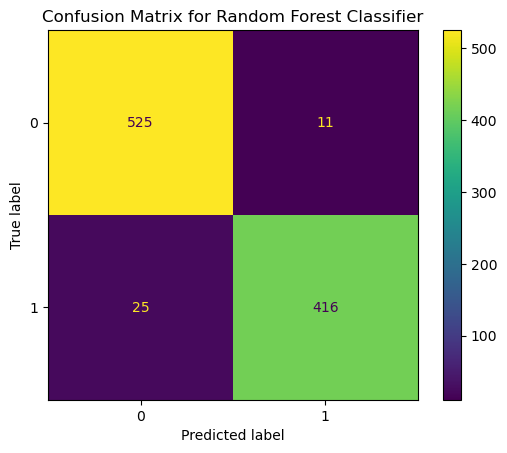

In [ ]:
# Generating the confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score

# plot confusion matrix
cm = confusion_matrix(y_test, preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
disp.ax_.set_title('Confusion Matrix for Random Forest Classifier')

Caclulate `Accuracy`, `F1-Score` and `Recall`

In [ ]:
# Accuracy, F1 Score and Recall Score

accuracy = accuracy_score(y_test, preds)
f1 = f1_score(y_test, preds)
recall = recall_score(y_test, preds)


print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Recall Score: {recall}')

Accuracy: 0.9631525076765609
F1 Score: 0.9585253456221199
Recall Score: 0.9433106575963719


Visalize the feature importance and comment on them. Compare the results with that of the Decisions Tree algorith. If they are different why do you think that is the case?

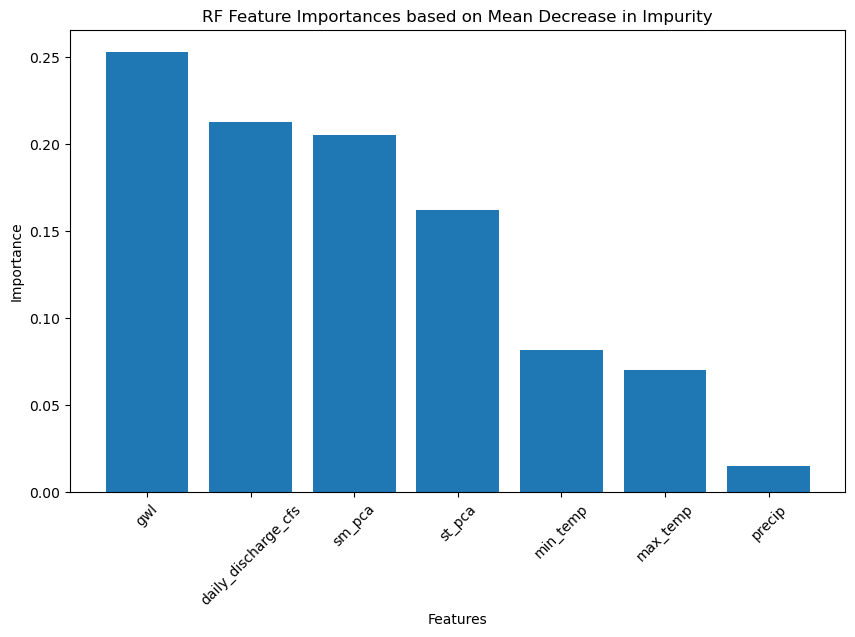

In [ ]:
# visualizing the feature importance

importances = classifier.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("RF Feature Importances based on Mean Decrease in Impurity")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices])
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

Visualize the Decision Tree for random froest classifer.

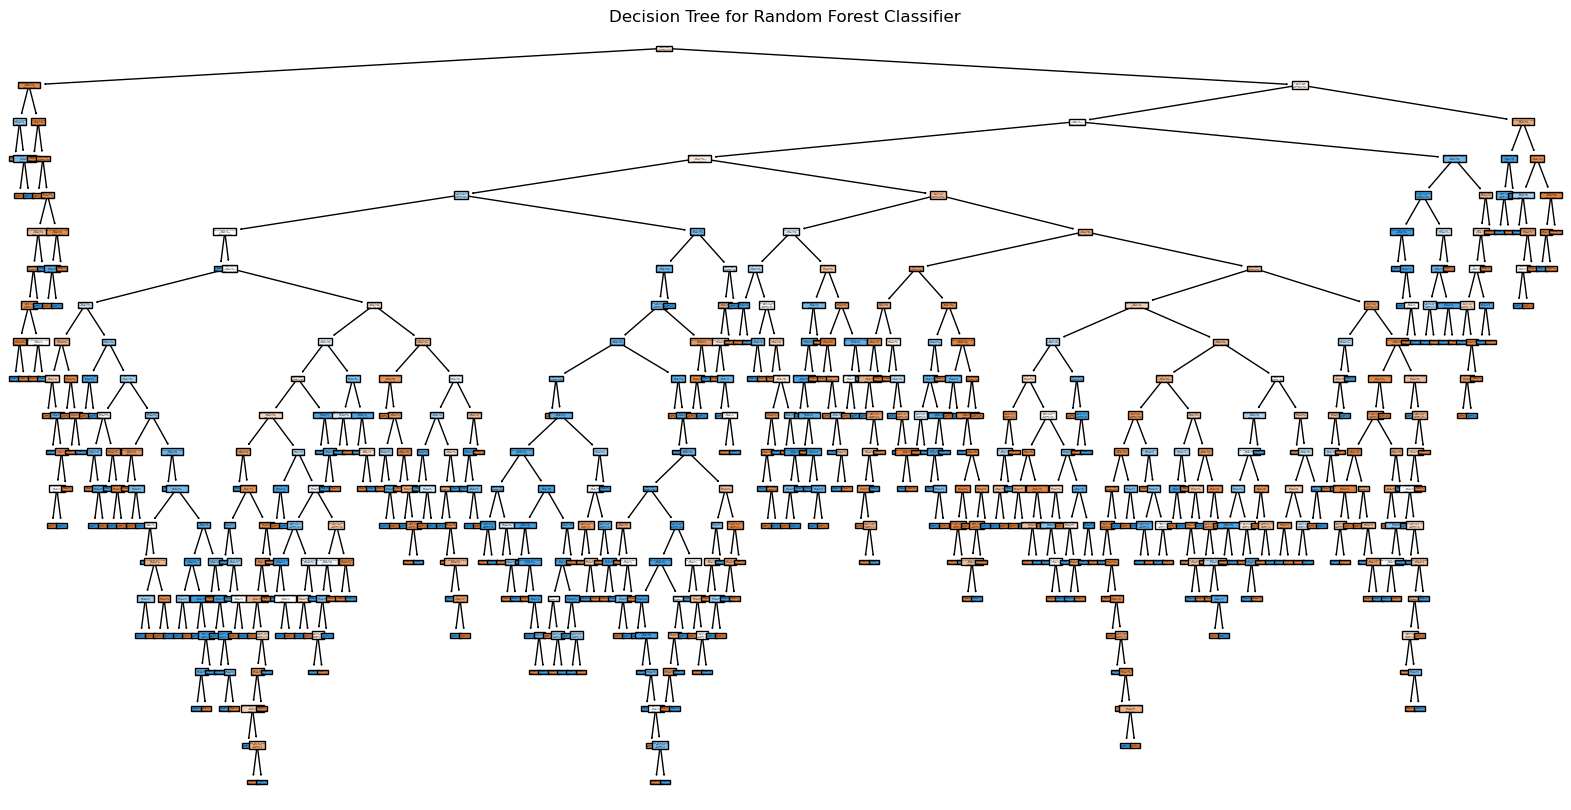

In [ ]:
# Visualizing the decision tree for Random Forest Classifier

plt.figure(figsize=(20, 10))
plot_tree(classifier.estimators_[0], feature_names=features, filled=True)
plt.title('Decision Tree for Random Forest Classifier')
plt.show()